# Import Dataset and Packages

## Packages

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import math
from tqdm import tqdm

# import googletrans
import time

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [159]:
rf = pd.read_csv("../3 method best result/bestresult_RF_CC_nostemstop.csv",sep=";")
rf.head()

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,USER Anak pecun... ga jauh2 dr hobi zina.. haha',1,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,USER Udah siap di demo berjilid2 sama bani cin...,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10,Hamdalah. Kelar juga ini fitur keparat.',0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,USER Jancuk! Pingin gue tabok itu anak',1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
bilstm = pd.read_csv("../3 method best result/bestresult_bilstm_nostemstop.csv",sep=";")
bilstm.head()

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,6,USER Khan yg ngajarin si garong kafir',1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,USER Anak pecun... ga jauh2 dr hobi zina.. haha',1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,9,USER Udah siap di demo berjilid2 sama bani cin...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [162]:
bert = pd.read_csv("../3 method best result/bestresult_Bert_nostemstop.csv",sep=";")
bert.head()

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,USER Khan yg ngajarin si garong kafir',1,1,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,USER Anak pecun... ga jauh2 dr hobi zina.. haha',1,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,USER Udah siap di demo berjilid2 sama bani cin...,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Normalization Check

In [61]:
data_n = pd.read_csv("../Data/HateSpeechText_new.csv",sep=";",encoding="latin-1")

In [60]:
def cleaning(data):
    data['Tweet_Parsed_1'] = data['Tweet'].str.replace("\\\\r", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\\\\n", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\n", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\r", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("&amp", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("&gt", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("&lt", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("    ", " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace('"', '')
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")
    return data

def lowerCase(data):
    data['Tweet_Parsed_2'] = data['Tweet_Parsed_1'].str.lower()
    return data

def removePunct(data):
    data['Tweet_Parsed_3'] = data['Tweet_Parsed_2']
    data['Tweet_Parsed_3'] = data['Tweet_Parsed_3'].str.replace("'s","")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("can't","can not")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("ain't","am not")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("n't"," not")
    data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("'re"," are")
    data['Tweet_Parsed_3'] = data['Tweet_Parsed_3'].str.replace('[^a-zA-Z0-9]+',' ')
    return data

def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data['Tweet_Parsed_4'] = data['Tweet_Parsed_3']
    data['Tweet_Parsed_4'] = data['Tweet_Parsed_4'].map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

def getNormalizedWord(text, stdword_,nonstdword_):
    text = text.split(" ")
    list_word = []
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            word = "("+str(text[i])+","+str(stdword_[index])+")"
            list_word.append(word)
    return ', '.join(map(str, list_word))

def putNormalizedWord(data,stdword_,nonstdword_):
    data['normalized_word'] = data['Tweet_Parsed_3']
    data['normalized_word'] = data['normalized_word'].map(lambda com : getNormalizedWord(com, stdword_,nonstdword_))
    return data

In [51]:
kamus_normal = pd.read_csv("../Data/kamusnormalisasi.csv",encoding='latin-1',header=None,names=["non-standard word","standard word"])
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [62]:
data_n = cleaning(data_n)
data_n = lowerCase(data_n)
data_n = removePunct(data_n)
data_n = normalizeData(data_n, stdword, nonstdword)
data_n = putNormalizedWord(data_n, stdword, nonstdword)

In [64]:
data_n = data_n.drop(['Tweet_Parsed_1','Tweet_Parsed_2','Tweet_Parsed_3'],axis=1)
data_n = data_n.rename(columns={'Tweet_Parsed_4': 'Tweet_Parsed'})
data_n

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed,normalized_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua pria berusaha melacak perhatian...,"(disaat,di saat), (cowok,pria), (gue,aku), (lo..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt user user siapa yang telat memberi tau kamu...,"(ngasih,memberi), (elu,kamu), (edan,gila), (gu..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,"(ninggalkan,meninggalkan), (orangtuaku,orang t..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu aku aku tau matamu sipit tap...,"(ku,aku), (diliat,dilihat)"
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum kecebong kafir sudah kelihatan ...,"(cebong,kecebong), (kapir,kafir), (udah,sudah)..."
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,user ya bani taplak dan kawan kawan,"(dkk,dan kawan kawan)"
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,deklarasi pilihan kepala daerah 2018 aman dan ...,"(pilkada,pilihan kepala daerah), (hoax,hoaks)"
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,aku baru saja selesai re watch aldnoah zero pa...,"(gue,aku), (aja,saja), (kelar,selesai), (emang..."
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,nah admin belanja satu lagi port terbaik nak m...,"(kaw,kamu), (kaw,kamu), (doket,dekat), (mano,m..."
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,user enak lagi kalau sambil ngewe,"(lg,lagi), (klo,kalau), (smbil,sambil)"


In [67]:
data_normalized = data_n[data_n['normalized_word']!=""].copy()
data_normalized.shape

(16414, 15)

In [68]:
data_normalized.to_csv("../3 method best result/normalized_tweet.csv",index=False,sep=";")

# Best Result Analysis

**Best Result : Random Forest without Stopword Removal**

## OOV Check

In [5]:
fitur_nostemstop = pd.read_csv("../data/data_test_nostemstop_tfidf.csv").columns[:-12]

In [7]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if (token != "" and token != " ")]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

In [8]:
oov_test = oov(fitur_nostemstop, generate_ngrams(rf['Tweet_Parsed']))
oov_test_word = np.array([i for i in np.unique(oov_test)if i != ''])

In [9]:
def get_oov_tweet(text, oov):
    text_split = text.split(" ")
    oov_list = []
    for i in text_split:
        if i in oov:
            oov_list.append(i)    
    oov_tweet = ', '.join(map(str,oov_list))
    return oov_tweet

def putOOV(data, oov):
    data['OOV'] = data['Tweet_Parsed']
    data['OOV'] = data['OOV'].map(lambda com : get_oov_tweet(com, oov))
    return data

In [10]:
rf_anl = rf.copy()
rf_anl = putOOV(rf_anl,oov_test_word)

In [11]:
print("total miss classified tweet : ", len(rf))
print("miss classified tweet with oov : ",len(rf_anl[rf_anl['OOV']!=""]))
print("miss classified tweet without oov : ",len(rf_anl[rf_anl['OOV']==""]))

total miss classified tweet :  1115
miss classified tweet with oov :  886
miss classified tweet without oov :  229


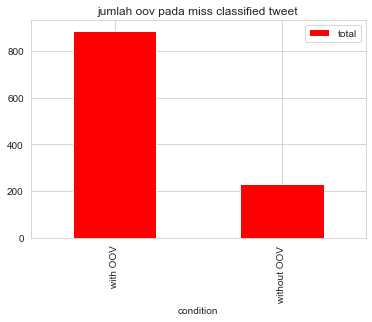

In [12]:
pd.DataFrame({
    "condition" : ["with OOV", "without OOV"],
    "total" : [len(rf_anl[rf_anl['OOV']!=""]),len(rf_anl[rf_anl['OOV']==""])] 
}).set_index(['condition']).plot(
    kind='bar', color='red', title='jumlah oov pada miss classified tweet')

In [13]:
pd.DataFrame({
    "condition" : ["with OOV", "without OOV"],
    "total" : [len(rf_anl[rf_anl['OOV']!=""]),len(rf_anl[rf_anl['OOV']==""])] 
}).set_index(['condition'])

,total
condition,
with OOV,886
without OOV,229


In [14]:
rf_anl[rf_anl['OOV']==""].to_csv("../3 method best result/rf_cc_nostemstop_no_oov.csv",index=False,sep=";")

In [15]:
rf_anl[rf_anl['OOV']!=""].to_csv("../3 method best result/rf_cc_nostemstop_with_oov.csv",index=False,sep=";")

## Translate Check

In [13]:
def getLang(data):
    list_lang =[]
    for i in tqdm(data['Tweet_Parsed']):
        translator = googletrans.Translator()
        lang = translator.translate(i).src
        list_lang.append(lang)
        time.sleep(2)
    return list_lang

def putLang(data, list_lang):
    data['Language'] = list_lang
    return data

In [85]:
data_test_predict_notrans = pd.read_csv("../3 method best result/test_predict_RF_CC_nostemstop.csv",sep=";")
data_test_predict_trans = pd.read_csv("../3 method best result/test_predict_RF_CC_trans_nostemstop.csv",sep=";")

In [86]:
temp_notrans = pd.read_csv("../Data/data_test_nostemstop_preprocessed.csv",sep=";")

In [18]:
temp_notrans = putLang(temp_notrans, getLang(temp_notrans))

100%|████████████████████████████████████████████████████████████████████████████| 3680/3680 [2:16:45<00:00,  2.21s/it]


In [16]:
temp_notrans.to_csv("../3 method best result/data_language.csv",index=False,sep=";")

NameError: name 'temp_notrans' is not defined

In [87]:
temp_notrans = pd.read_csv("../3 method best result/data_language.csv",sep=";")

In [88]:
translated_tweet = temp_notrans[(temp_notrans["Language"] == "en")].copy()

In [89]:
data_test_predict_notrans = data_test_predict_notrans.merge(translated_tweet[['Index','Language']], how='inner', on = ['Index'])
data_test_predict_trans = data_test_predict_trans.merge(translated_tweet[['Index','Language']], how='inner', on = ['Index'])

In [90]:
false_notrans = data_test_predict_notrans[(data_test_predict_notrans["HS"]!=data_test_predict_notrans["HS_predict"]) | (data_test_predict_notrans["Abusive"] != data_test_predict_notrans["Abusive_predict"]) | (data_test_predict_notrans["HS_Individual"] != data_test_predict_notrans["HS_Individual_predict"]) | (data_test_predict_notrans["HS_Group"] != data_test_predict_notrans["HS_Group_predict"]) | (data_test_predict_notrans["HS_Religion"] != data_test_predict_notrans["HS_Religion_predict"]) | (data_test_predict_notrans["HS_Race"] != data_test_predict_notrans["HS_Race_predict"]) | (data_test_predict_notrans["HS_Physical"] != data_test_predict_notrans["HS_Physical_predict"]) | (data_test_predict_notrans["HS_Gender"] != data_test_predict_notrans["HS_Gender_predict"]) | (data_test_predict_notrans["HS_Other"] != data_test_predict_notrans["HS_Other_predict"]) | (data_test_predict_notrans["HS_Weak"] != data_test_predict_notrans["HS_Weak_predict"]) | (data_test_predict_notrans["HS_Moderate"] != data_test_predict_notrans["HS_Moderate_predict"]) | (data_test_predict_notrans["HS_Strong"] != data_test_predict_notrans["HS_Strong_predict"])]
true_notrans = data_test_predict_notrans[(data_test_predict_notrans["HS"]==data_test_predict_notrans["HS_predict"]) & (data_test_predict_notrans["Abusive"] == data_test_predict_notrans["Abusive_predict"]) & (data_test_predict_notrans["HS_Individual"] == data_test_predict_notrans["HS_Individual_predict"]) & (data_test_predict_notrans["HS_Group"] == data_test_predict_notrans["HS_Group_predict"]) & (data_test_predict_notrans["HS_Religion"] == data_test_predict_notrans["HS_Religion_predict"]) & (data_test_predict_notrans["HS_Race"] == data_test_predict_notrans["HS_Race_predict"]) & (data_test_predict_notrans["HS_Physical"] == data_test_predict_notrans["HS_Physical_predict"]) & (data_test_predict_notrans["HS_Gender"] == data_test_predict_notrans["HS_Gender_predict"]) & (data_test_predict_notrans["HS_Other"] == data_test_predict_notrans["HS_Other_predict"]) & (data_test_predict_notrans["HS_Weak"] == data_test_predict_notrans["HS_Weak_predict"]) & (data_test_predict_notrans["HS_Moderate"] == data_test_predict_notrans["HS_Moderate_predict"]) & (data_test_predict_notrans["HS_Strong"] == data_test_predict_notrans["HS_Strong_predict"])]
false_trans = data_test_predict_trans[(data_test_predict_trans["HS"]!=data_test_predict_trans["HS_predict"]) | (data_test_predict_trans["Abusive"] != data_test_predict_trans["Abusive_predict"]) | (data_test_predict_trans["HS_Individual"] != data_test_predict_trans["HS_Individual_predict"]) | (data_test_predict_trans["HS_Group"] != data_test_predict_trans["HS_Group_predict"]) | (data_test_predict_trans["HS_Religion"] != data_test_predict_trans["HS_Religion_predict"]) | (data_test_predict_trans["HS_Race"] != data_test_predict_trans["HS_Race_predict"]) | (data_test_predict_trans["HS_Physical"] != data_test_predict_trans["HS_Physical_predict"]) | (data_test_predict_trans["HS_Gender"] != data_test_predict_trans["HS_Gender_predict"]) | (data_test_predict_trans["HS_Other"] != data_test_predict_trans["HS_Other_predict"]) | (data_test_predict_trans["HS_Weak"] != data_test_predict_trans["HS_Weak_predict"]) | (data_test_predict_trans["HS_Moderate"] != data_test_predict_trans["HS_Moderate_predict"]) | (data_test_predict_trans["HS_Strong"] != data_test_predict_trans["HS_Strong_predict"])]
true_trans = data_test_predict_trans[(data_test_predict_trans["HS"]==data_test_predict_trans["HS_predict"]) & (data_test_predict_trans["Abusive"] == data_test_predict_trans["Abusive_predict"]) & (data_test_predict_trans["HS_Individual"] == data_test_predict_trans["HS_Individual_predict"]) & (data_test_predict_trans["HS_Group"] == data_test_predict_trans["HS_Group_predict"]) & (data_test_predict_trans["HS_Religion"] == data_test_predict_trans["HS_Religion_predict"]) & (data_test_predict_trans["HS_Race"] == data_test_predict_trans["HS_Race_predict"]) & (data_test_predict_trans["HS_Physical"] == data_test_predict_trans["HS_Physical_predict"]) & (data_test_predict_trans["HS_Gender"] == data_test_predict_trans["HS_Gender_predict"]) & (data_test_predict_trans["HS_Other"] == data_test_predict_trans["HS_Other_predict"]) & (data_test_predict_trans["HS_Weak"] == data_test_predict_trans["HS_Weak_predict"]) & (data_test_predict_trans["HS_Moderate"] == data_test_predict_trans["HS_Moderate_predict"]) & (data_test_predict_trans["HS_Strong"] == data_test_predict_trans["HS_Strong_predict"])]

**CHECK :**

- FALSE in without translate, TRUE with translate
- FALSE in without translate, FALSE with translate
- TRUE in without translate, TRUE with translate
- TRUE in without translate, FALSE with translate

In [93]:
false_true = false_notrans.merge(true_trans, how='inner', on = ['Index'],suffixes=("_notrans","_trans"))
false_false = false_notrans.merge(false_trans, how='inner', on = ['Index'],suffixes=("_notrans","_trans"))
true_true = true_notrans.merge(true_trans, how='inner', on = ['Index'],suffixes=("_notrans","_trans"))
true_false = true_notrans.merge(false_trans, how='inner', on = ['Index'],suffixes=("_notrans","_trans"))

In [97]:
false_true.to_csv("../3 method best result/false_true_translatecheck.csv",index=False,sep=";")
false_false.to_csv("../3 method best result/false_false_translatecheck.csv",index=False,sep=";")
true_true.to_csv("../3 method best result/true_true_translatecheck.csv",index=False,sep=";")
true_false.to_csv("../3 method best result/true_false_translatecheck.csv",index=False,sep=";")

In [96]:
pd.DataFrame({
    "condition" : ["False - True","False - False","True - True","True - False"],
    "Total" : [false_true.shape[0],false_false.shape[0],true_true.shape[0],true_false.shape[0]]
})

,condition,Total
0,False - True,35
1,False - False,206
2,True - True,432
3,True - False,65


In [95]:
true_false

,Index,Tweet_notrans,HS_notrans,Abusive_notrans,HS_Individual_notrans,HS_Group_notrans,HS_Religion_notrans,HS_Race_notrans,HS_Physical_notrans,HS_Gender_notrans,...,HS_Group_predict_trans,HS_Religion_predict_trans,HS_Race_predict_trans,HS_Physical_predict_trans,HS_Gender_predict_trans,HS_Other_predict_trans,HS_Weak_predict_trans,HS_Moderate_predict_trans,HS_Strong_predict_trans,Language_trans
0,33,"When you cheat and ""win"" you've distinguished ...",1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
1,38,Why doe your bio. Look so fake? Are you a liar...,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
2,40,anyway wht can u do if i tell you about all th...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
3,154,Yall..Idk why yall are so offended when kelant...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
4,165,"Terserah mau blg gw cowo berengsek, dll. I won...",0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
5,230,The names don't even ring bells what years wer...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
6,239,A half of your gold came from your cheating. N...,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
7,260,"Why do people get happiness with their lives, ...",0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en
8,361,#ShamedByYou sby... a liar n a killer.. don't ...,1,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,en
9,440,BANGSAT JABLAY FUCK YOU MORON MOTHERFUCKER SON...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,en


## New Sequence

In [143]:
data_test_predict = pd.read_csv("../3 method best result/test_predict_RF_CC_nostemstop.csv",sep=";")
data_train = pd.read_csv("../Data/data_train_nostemstop_preprocessed.csv",sep=";")

In [144]:
true_test_predict = data_test_predict[(data_test_predict["HS"]==data_test_predict["HS_predict"]) & (data_test_predict["Abusive"] == data_test_predict["Abusive_predict"]) & (data_test_predict["HS_Individual"] == data_test_predict["HS_Individual_predict"]) & (data_test_predict["HS_Group"] == data_test_predict["HS_Group_predict"]) & (data_test_predict["HS_Religion"] == data_test_predict["HS_Religion_predict"]) & (data_test_predict["HS_Race"] == data_test_predict["HS_Race_predict"]) & (data_test_predict["HS_Physical"] == data_test_predict["HS_Physical_predict"]) & (data_test_predict["HS_Gender"] == data_test_predict["HS_Gender_predict"]) & (data_test_predict["HS_Other"] == data_test_predict["HS_Other_predict"]) & (data_test_predict["HS_Weak"] == data_test_predict["HS_Weak_predict"]) & (data_test_predict["HS_Moderate"] == data_test_predict["HS_Moderate_predict"]) & (data_test_predict["HS_Strong"] == data_test_predict["HS_Strong_predict"])]

In [149]:
data_train.columns[1:-1]

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [155]:
data_test_predict.columns[2:14]

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [147]:
true_test_predict[true_test_predict.columns[15:]].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [152]:
[1,2,3] in [[3,1,2],[3,2,1]]

False

In [156]:
sum = 0
for i in data_test_predict[data_test_predict.columns[2:14]].values:
    if i in data_train[data_train.columns[1:-1]].values:
        sum = sum+1

In [157]:
sum

3680

In [129]:
def make_sequence(data):
    seq = [', '.join(map(str, i)) for i in data]
    return seq

def put_sequence(data, sequence, seq_type = "actual"):
    if seq_type == "actual":
        data["actual_sequence"] = sequence
    else:
        data["predict_sequence"] = sequence
    return data

In [141]:
true_test_predict = put_sequence(true_test_predict, make_sequence(true_test_predict[true_test_predict.columns[2:14]].values),"actual")
true_test_predict = put_sequence(true_test_predict, make_sequence(true_test_predict[true_test_predict.columns[15:-1]].values),"predict")

In [142]:
true_test_predict

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict,actual_sequence,predict_sequence
1,2,Sakit jiwa kali yah..,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
2,3,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
3,4,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,"1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0","1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0"
4,5,USER USER Jgn salah itu janji jokowi yg di tun...,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,"1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0","1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0"
5,6,USER Khan yg ngajarin si garong kafir',1,1,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,"1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0","1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0"
6,7,"i might say ""kontol"" more often because its im...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
10,11,Coffee really got me wired right now. A non co...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
12,13,Tasik Chini yg diiktiraf Rizab Biosfera oleh U...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
13,14,Yue: i can excuse kiki and asheng becoming cab...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
14,15,HEBAHAN PENAWARAN PROGRAM DIPLOMA PENDIDIKAN L...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"


# 3 Method Best Result Analsysis

**a. Random forest without stopword removal using classifer chain (best of all)**

**b. BiLSTM without stemming and stopword removal**

**c. BERT and BiLSTM without stemming and stopword removal**

3. 1. *Miss Classified Tweet Only in RF*

In [163]:
rf_only = rf.merge(bilstm[['Index']], how='left', on = ['Index'], indicator=True)
rf_only = rf_only[rf_only['_merge']=="left_only"].drop(["_merge"],axis=1).merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
rf_only = rf_only[rf_only['_merge']=="left_only"].drop(["_merge"],axis=1)

In [164]:
rf_only

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
4,82,USER Bokong cekcih \xf0\x9f\x98\x82',0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,182,USER USER USER Kabur karna tdk sependapat dgn ...,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,184,USER HUHUHUHU TIBA2 SM KIM BUM PLOT TWIST BANG...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,223,Fuyyyyyoooo babi laaa mindfuck sial dah ada da...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,227,"dan PSSI RT USER FPI, JAT, HTI, and other cha...",0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,231,USER u used to smile in front of camera ... N...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,307,Malaysia is the worst SEA Games host ever!! #S...,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,314,Again bullshit comment Josh! Abbott could have...,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18,319,"I go up steps, down steps, travel on trains, b...",0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,321,Anjing juga:( dogs deserve to live just as wel...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
print("total miss classified tweet only in RF : ", len(rf_only))

total miss classified tweet only in RF :  102


3. 2. Miss Classified Tweet Only in BiLSTM

In [166]:
bilstm_only = bilstm.merge(rf[['Index']], how='left', on = ['Index'], indicator=True)
bilstm_only = bilstm_only[bilstm_only['_merge']=="left_only"].drop(["_merge"],axis=1).merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
bilstm_only = bilstm_only[bilstm_only['_merge']=="left_only"].drop(["_merge"],axis=1)

In [167]:
bilstm_only

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,3,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,19,"I like you. You like him, itukan berengsek :3 ...",0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,29,Over 190 million Indonesians have voted for a ...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,37,I ever since 2016 came to work early and finis...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,54,USER Dah pernah naik onta ?',0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12,68,Teroris Budha juga merendahkan Al-Quran!,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14,79,I'M LAUGHING TOO MUCH HAHAHAHAHAHAHAHA WHAT TH...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,83,Kita bangga dg prestasi Musa La Ode Abu Hanafi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,90,bukan fiktif tapi fiksi,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
20,91,pltl sorry rl ada yg kristen mau masuk grup dm?',0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
print("total miss classified tweet only in BiLSTM : ", len(bilstm_only))

total miss classified tweet only in BiLSTM :  350


3. 3. Miss Classified Tweet Only in BERT

In [169]:
bert_only = bert.merge(rf[['Index']], how='left', on = ['Index'], indicator=True)
bert_only = bert_only[bert_only['_merge']=="left_only"].drop(["_merge"],axis=1).merge(bilstm[['Index']], how='left', on = ['Index'], indicator=True)
bert_only = bert_only[bert_only['_merge']=="left_only"].drop(["_merge"],axis=1)

In [170]:
bert_only

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,4,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,Coffee really got me wired right now. A non co...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,Yue: i can excuse kiki and asheng becoming cab...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,USER Sebenernya siapa sih yang mempunyai hak u...,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,21,indonesia: literally suffocating from the air ...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,34,Beli barang pengiriman dr cina biasanya paket ...,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,35,No pork is najis or dirty. It is considered ak...,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,38,Why doe your bio. Look so fake? Are you a liar...,1,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11,45,"USER dia tau tau ngechat gua beb ,gada angin g...",0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
17,75,Ah sorry I didn't know that's what you meant. ...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
print("total miss classified tweet only in BERT : ", len(bert_only))

total miss classified tweet only in BERT :  458


3. 4. *Miss Classifier Tweet Only RF and BiLSTM*

In [172]:
rf_bilstm = rf.merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
rf_bilstm = rf_bilstm[rf_bilstm['_merge']=="left_only"].drop(["_merge"],axis=1).merge(bilstm[['Index']], how='left', on = ['Index'], indicator=True)
rf_bilstm = rf_bilstm[rf_bilstm['_merge']=="both"].drop(["_merge"],axis=1)

In [173]:
rf_bilstm

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,12,USER Jancuk! Pingin gue tabok itu anak',1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,"RT USER: Ya, saya bajingan\nTERIMA KASIH'",0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,77,USER Sumpah ga lucu bgt jadiin autis bahan ber...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123,USER Gak ada gunanya berdebat...klo tujuannya ...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,135,Uncivilized coward citizen doing coward thing ...,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,142,USER Rezim sekrng ini brupaya mncuci otak gene...,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,149,Pas lg makan dpt omelan itu rasanya seperti ma...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,167,Potret Rezim Jokowi anti pd umat islam bkn sj ...,1,0,1,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,171,Aku nggak bisa ngebayangin gimana perasaan mba...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,173,USER Ngga ada kucing yang kesurupan karena kuc...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
print("total miss classified tweet only RF and BiLSTM : ", len(rf_bilstm))

total miss classified tweet only RF and BiLSTM :  158


3. 5. Miss Classified Tweet Only RF and BERT

In [175]:
rf_bert = rf.merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
rf_bert = rf_bert[rf_bert['_merge']=="both"].drop(["_merge"],axis=1).merge(bilstm[['Index']], how='left', on = ['Index'], indicator=True)
rf_bert = rf_bert[rf_bert['_merge']=="left_only"].drop(["_merge"],axis=1)

In [176]:
rf_bert

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
3,10,Hamdalah. Kelar juga ini fitur keparat.',0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,"USER Kelemahan gerindra itu ada di orang ini,....",1,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,41,Kok cuma cina non muslim yg dibantai? Tuh si U...,1,0,0,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,64,USER USER USER Segitu gentarnya dia takut terh...,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,99,BANGSAT BANGET HE KNOW HE THICC HE KNOW HE THE...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,110,Memang iblis punya perangai yang buat kucing m...,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,240,ehem USER ... kayaknya sudah saatnya di turunk...,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,290,USER \xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\...,1,1,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
56,302,USER USER USER USER USER USER USER USER Klo ko...,1,1,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
58,310,Some things doesn't add up from the present ra...,0,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [177]:
print("total miss classified tweet only RF and BERT : ", len(rf_bert))

total miss classified tweet only RF and BERT :  142


3. 6. Miss Classified Tweet Only BiLSTM and BERT

In [178]:
bilstm_bert = bilstm.merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
bilstm_bert = bilstm_bert[bilstm_bert['_merge']=="both"].drop(["_merge"],axis=1).merge(rf[['Index']], how='left', on = ['Index'], indicator=True)
bilstm_bert = bilstm_bert[bilstm_bert['_merge']=="left_only"].drop(["_merge"],axis=1)

In [179]:
bilstm_bert

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
1,6,USER Khan yg ngajarin si garong kafir',1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40,anyway wht can u do if i tell you about all th...,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,43,USER Mau dibucinin lah asw udh dibucinin kok g...,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
10,46,"Tangung kalau cuma blokir jokowi, yuk ah tingk...",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,59,USER USER USER USER USER USER USER USER USER U...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,61,"Fuck you, i'd raid for giratina three times, b...",1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,67,Kemacetan makin menggila. ; Karena pertumbuhan...,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,69,USER emg produk cina \xf0\x9f\x92\xaf\xf0\x9f\...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21,84,"This is so wrong in every level,\nUcapan natal...",0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
22,85,USER apa? vin? gimana gimana? mata gue budek g...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [180]:
print("total miss classified tweet only BiLSTM and BERT : ", len(bilstm_bert))

total miss classified tweet only BiLSTM and BERT :  364


3. 7. Miss Classified Tweet RF, BiLSTM, and BERT

In [181]:
rf_bilstm_bert = rf.merge(bilstm[['Index']], how='left', on = ['Index'], indicator=True)
rf_bilstm_bert = rf_bilstm_bert[rf_bilstm_bert['_merge']=="both"].drop(["_merge"],axis=1).merge(bert[['Index']], how='left', on = ['Index'], indicator=True)
rf_bilstm_bert = rf_bilstm_bert[rf_bilstm_bert['_merge']=="both"].drop(["_merge"],axis=1)

In [182]:
rf_bilstm_bert

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,USER Anak pecun... ga jauh2 dr hobi zina.. haha',1,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,USER Udah siap di demo berjilid2 sama bani cin...,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,23,#MataNajwaDebatJakarta lucu banget jawaban aho...,1,1,1,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,25,USER Astagaaa.. Sewa pecun skalian ga pak?',0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,31,Pantes idiot makananya upil URL,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,39,educate your self a lil before saying things l...,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,48,I know. I hate her because she looks bitchy an...,1,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,49,USER Hasil revolusi mental kenapa jadi pada ca...,1,1,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11,53,Kejar setoran ke cina sebelum pak Djarot lengs...,1,1,1,0,0,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
print("total miss classified tweet RF, BiLSTM, and BERT : ", len(rf_bilstm_bert))

total miss classified tweet RF, BiLSTM, and BERT :  713


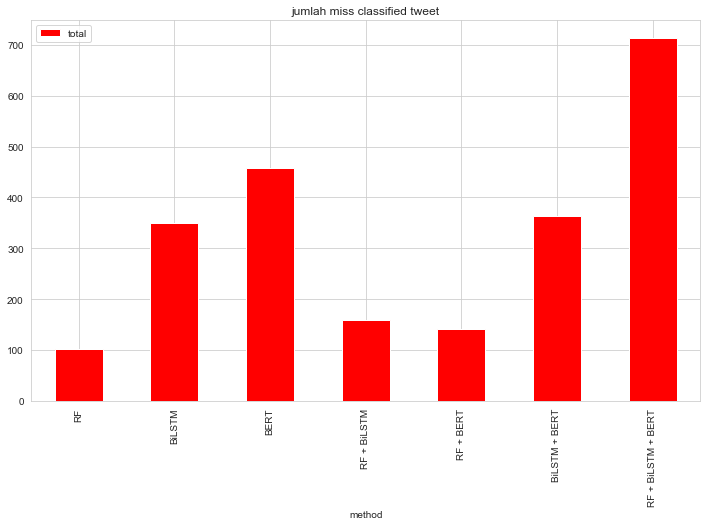

In [184]:
pd.DataFrame({
    "method" : ["RF", "BiLSTM", "BERT", "RF + BiLSTM", "RF + BERT", "BiLSTM + BERT", "RF + BiLSTM + BERT"],
    "total" : [len(rf_only),len(bilstm_only),len(bert_only),len(rf_bilstm),len(rf_bert),len(bilstm_bert),len(rf_bilstm_bert)]
}).set_index(['method']).plot(
    kind='bar', color='red', title='jumlah miss classified tweet', figsize=(12,7))

In [185]:
pd.DataFrame({
    "method" : ["RF", "BiLSTM", "BERT", "RF + BiLSTM", "RF + BERT", "BiLSTM + BERT", "RF + BiLSTM + BERT"],
    "total" : [len(rf_only),len(bilstm_only),len(bert_only),len(rf_bilstm),len(rf_bert),len(bilstm_bert),len(rf_bilstm_bert)]
}).set_index(['method'])

,total
method,
RF,102
BiLSTM,350
BERT,458
RF + BiLSTM,158
RF + BERT,142
BiLSTM + BERT,364
RF + BiLSTM + BERT,713


In [186]:
rf_only.to_csv("../3 method best result/rf_only.csv",index=False,sep=";")
bilstm_only.to_csv("../3 method best result/bilstm_only.csv",index=False,sep=";")
bert_only.to_csv("../3 method best result/bert_only.csv",index=False,sep=";")

### What RF can do in other Method

In [187]:
RF_predict = pd.read_csv("../3 method best result/test_predict_RF_CC_nostemstop.csv",sep=";")

In [188]:
true_exact_tweet_test = RF_predict[(RF_predict["HS"]==RF_predict["HS_predict"]) & (RF_predict["Abusive"] == RF_predict["Abusive_predict"]) & (RF_predict["HS_Individual"] == RF_predict["HS_Individual_predict"]) & (RF_predict["HS_Group"] == RF_predict["HS_Group_predict"]) & (RF_predict["HS_Religion"] == RF_predict["HS_Religion_predict"]) & (RF_predict["HS_Race"] == RF_predict["HS_Race_predict"]) & (RF_predict["HS_Physical"] == RF_predict["HS_Physical_predict"]) & (RF_predict["HS_Gender"] == RF_predict["HS_Gender_predict"]) & (RF_predict["HS_Other"] == RF_predict["HS_Other_predict"]) & (RF_predict["HS_Weak"] == RF_predict["HS_Weak_predict"]) & (RF_predict["HS_Moderate"] == RF_predict["HS_Moderate_predict"]) & (RF_predict["HS_Strong"] == RF_predict["HS_Strong_predict"])]

In [189]:
rf_true_bilstm_false = true_exact_tweet_test.merge(bilstm[['Index']], how='inner', on = ['Index'])
rf_true_bert_false = true_exact_tweet_test.merge(bert[['Index']], how='inner', on = ['Index'])

In [190]:
len(rf_true_bilstm_false)

714

In [191]:
len(rf_true_bert_false)

822

In [192]:
len(bert)

1677